<a href="https://colab.research.google.com/github/Modequick/Machine-Learning-Project/blob/main/Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [435]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [436]:
df=pd.read_csv("/content/drive/MyDrive/Skripsi/Change_Accom_Behavior_Hashed 2.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Improving Data Logic


In [437]:
df.head()

,profile_id,order_id,accom_id,room_id,accom_chain_name,selling_price_idr,gbv_idr,coupon_idr,sales_date_utc7,sales_timestamp,...,next_category_1,next_category_2,next_category_3,next_latest_sentiment_analysis,next_room_type,next_bed_type,next_room_size_inmeter,count_buy_that_day,count_buy_that_month,count_buy_that_next_day
0,ET0LCvUlRKbtFLscAFkCi/WWLLw=,HCcNAiyXSymMGRQkSqzAAtFlMxc=,Uz+MOvMFoXZMCkmixPFGgpTm9lU=,L6H56k4Rou+RiVAeX2QFwrv6xwY=,NaN,524927.868189,570579.672607,0,2018-09-22,2018-09-22 09:35:41.027 UTC,...,NaN,NaN,NaN,NaN,DELUXE,ONE_DOUBLE_BED,NaN,2,7,1
1,exoQ3kUraPU4wFlzPkk5+ykBwTs=,sRDgi4iW3och3ZkFvI/7aW1P3xY=,PMJIaKNhV02UjxNiev3Ltce2kNQ=,h10O5X/RJjDGNa+4oSVmxZBhplQ=,iCwYKECg554FmWkZKOS6O7I8nXA=,853068.342720,721837.932454,0,2018-09-22,2018-09-22 03:16:16.417 UTC,...,NaN,NaN,NaN,NaN,NaN,KING,25.0,2,4,1
2,9GuIvtbdJFVdHFM/0x1p345wCwM=,xlSmSKB3tahvfYZ1DEq0Zu3nek0=,Y4UBm0bDkNkWK2JWpzmbJTlQLqc=,lqSNqRT0DKCxUC60BE3jFG5BwNQ=,NaN,192613.180745,188957.123586,0,2018-09-22,2018-09-22 01:28:14.882 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED,18.5,2,4,1
3,QXB7Zobjy0aW6Q8SYt8DQD7fSrQ=,3d4xj1dEU8Q1tSY2APAxmcjlwFw=,TxJe7ItZLbtw1K8Aqlem51jNvaE=,P+HWuys1viVCcm4/aqWuEJ91tb0=,cCnyuGlSTM26W1cOgCNhFiEe+R8=,300377.277202,404480.886678,0,2018-09-22,2018-09-22 22:09:32.201 UTC,...,NaN,NaN,NaN,NaN,NaN,ONE_DOUBLE_BED_OR_TWO_SINGLE_B,26.0,2,4,1
4,UVEV2qykZPJQ/kfd20M2/86qKrM=,Qnf6/o5tErU5iMEiwzkWhFfiIjc=,kneU7W4rjhdyr4nKoVOP17bfaVk=,wmCmvcyYOxvDtr5DADgjj48ClEs=,HIwm7tZAAnF5sNurgy85MraVTB0=,225738.474167,231019.601478,0,2018-09-22,2018-09-22 15:08:32.967 UTC,...,NaN,NaN,NaN,NaN,DOUBLE,ONE_DOUBLE_BED,16.0,2,9,1


#Exploratory Data Analysis

### Descriptive Statistic

In [438]:
df.describe()

,selling_price_idr,gbv_idr,coupon_idr,month,accom_star_rating,num_rooms,room_size_inmeter,pid_score,hotel_score,customer_type,...,next_coupon_idr,next_gbv_idr,next_num_rooms,next_pid_score,next_hotel_score,next_latest_sentiment_analysis,next_room_size_inmeter,count_buy_that_day,count_buy_that_month,count_buy_that_next_day
count,1.897000e+04,1.897000e+04,18970.0,18970.000000,18970.000000,18970.000000,16083.000000,4292.000000,18863.000000,0.0,...,18970.0,1.897000e+04,18970.000000,4503.000000,18901.000000,0.0,16498.000000,18970.000000,18970.000000,18970.000000
mean,9.729385e+05,1.002075e+06,0.0,6.912862,2.535055,1.140380,26.082299,7.429986,8.344548,NaN,...,0.0,7.708764e+05,1.108382,8.453720,8.405994,NaN,24.997850,1.633474,3.929626,1.023616
std,1.472729e+06,1.448589e+06,0.0,3.442707,1.314028,0.505188,43.551967,1.680153,0.522728,NaN,...,0.0,9.922236e+05,0.421818,1.209104,0.433077,NaN,38.938151,0.582149,2.204250,0.154947
min,2.472867e+04,0.000000e+00,0.0,1.000000,0.000000,1.000000,0.000000,4.500000,4.500000,NaN,...,0.0,0.000000e+00,1.000000,4.500000,4.500000,NaN,0.000000,1.000000,1.000000,1.000000
25%,3.290405e+05,3.458097e+05,0.0,4.000000,2.000000,1.000000,17.000000,6.000000,8.154945,NaN,...,0.0,3.284487e+05,1.000000,8.500000,8.243463,NaN,17.000000,1.000000,2.000000,1.000000
50%,5.790842e+05,5.986826e+05,0.0,7.000000,3.000000,1.000000,22.000000,8.500000,8.462074,NaN,...,0.0,5.014120e+05,1.000000,8.500000,8.496833,NaN,21.200000,2.000000,3.000000,1.000000
75%,1.086330e+06,1.119451e+06,0.0,10.000000,3.000000,1.000000,28.000000,8.500000,8.672630,NaN,...,0.0,8.486623e+05,1.000000,9.400000,8.675119,NaN,28.000000,2.000000,5.000000,1.000000
max,4.126696e+07,3.397809e+07,0.0,12.000000,5.000000,8.000000,2025.000000,10.000000,10.000000,NaN,...,0.0,2.678772e+07,8.000000,10.000000,10.000000,NaN,3600.000000,3.000000,10.000000,3.000000


### Data Cleaning

In [439]:
#missing_value
missing_value = df.isnull().sum() *100 / len(df) 

df_missing_value = pd.DataFrame( {"missing_count" : df.isnull().sum(),
             "percent_missing" : missing_value} )
print(df_missing_value.sort_values(by = "missing_count",ascending=False).head(20))

print("length of columns are : ", len(df.columns))

                                missing_count  percent_missing
next_latest_sentiment_analysis          18970       100.000000
customer_type                           18970       100.000000
latest_sentiment_analysis               18969        99.994729
next_category_3                         18946        99.873484
next_category_0                         18899        99.625725
next_category_1                         18899        99.625725
next_category_2                         18899        99.625725
category_3                              18854        99.388508
category_1                              18712        98.639958
category_2                              18712        98.639958
category_0                              18711        98.634686
pid_score                               14678        77.374802
next_pid_score                          14467        76.262520
room_type                               13324        70.237217
next_room_type                          12949        68

In [440]:

#selecing columns that are not in the list 
df_clean = df.loc[:, ~df.columns.isin(df_missing_value.sort_values(by = "missing_count",ascending=False).head(20).index)]


# droping non intuitive columns 
df_clean = df_clean.loc[:, ~df_clean.columns.isin(["count_buy_that_day",
                                                   "count_buy_that_month",
                                                   "count_buy_that_next_day",
                                                   "room_id",
                                                   "order_id",
                                                   "profile_id",
                                                   "interface",
                                                   "last_issued_date",
                                                   "next_bed_type",
                                                   "month",
                                                   "next_time_stamp",
                                                   "sales_timestamp",
                                                   "next_accom_id",
                                                   "next_is_use_coupon",
                                                   "next_num_rooms",
                                                   "next_gbv_idr",
                                                   "accom_id" ,
                                                   "check_in_date",
                                                   "check_out_date",
                                                   "sales_date_utc7",
                                                   "next_check_in_date",
                                                   "next_check_out_date",
                                                   "next_sales_date",
                                                   "next_is_use_coupon",
                                                   "is_use_coupon",
                                                   "next_coupon_idr",
                                                   "coupon_idr"
                                                   ])]
                                                   
#next_check_in_date,next_check_out_date,"next_check_in_date"

In [441]:
missing_value = df_clean.isnull().sum() *100 / len(df) 
df_missing_value = pd.DataFrame( {"missing_count" : df_clean.isnull().sum(),
             "percent_missing" : missing_value} )
print("length columns : ",len(df_clean.columns)  )
print(df_missing_value.sort_values(by = "missing_count",ascending=False))


length columns :  12
                        missing_count  percent_missing
hotel_score                       107         0.564048
next_hotel_score                   69         0.363732
accom_type                          2         0.010543
selling_price_idr                   0         0.000000
gbv_idr                             0         0.000000
accom_region                        0         0.000000
accom_star_rating                   0         0.000000
num_rooms                           0         0.000000
next_accom_region                   0         0.000000
next_accom_star_rating              0         0.000000
next_accom_type                     0         0.000000
next_selling_price                  0         0.000000


### Data Transformation 

In [442]:
df=df_clean 
# df_trial  = df.head(1000)
df.head()

,selling_price_idr,gbv_idr,accom_region,accom_star_rating,num_rooms,accom_type,hotel_score,next_accom_region,next_accom_star_rating,next_accom_type,next_selling_price,next_hotel_score
0,524927.868189,570579.672607,Jawa Barat,0,1,RESORT,8.742894,Jawa Barat,3,HOTEL,619873.919739,7.395015
1,853068.342720,721837.932454,Jawa Tengah,3,2,HOTEL,8.655503,Jawa Tengah,4,HOTEL,575869.264779,8.904430
2,192613.180745,188957.123586,Jakarta,2,1,HOTEL,7.758292,Jakarta,2,HOTEL,217938.428145,7.909794
3,300377.277202,404480.886678,Lampung Province,2,1,HOTEL,8.686632,Lampung Province,3,HOTEL,253241.759032,8.541579
4,225738.474167,231019.601478,Aceh,1,1,HOMESTAY,8.257246,Aceh,1,HOTEL,302766.724742,7.046263


In [443]:
#Data Transformation : Label encoding 

accom_region_value = df.groupby(by = ["accom_region"],as_index = False).agg({"selling_price_idr" : 'mean'}).rename(columns={'selling_price_idr':'accom_region_value'})
accom_type_value = df.groupby(by = ["accom_type"],as_index = False).agg({"selling_price_idr" : 'mean'}).rename(columns={'selling_price_idr':'accom_type_value'})
next_accom_region_value = df.groupby(by = ["next_accom_region"],as_index = False).agg({"next_selling_price" : 'mean'}).rename(columns={'next_selling_price':'next_accom_region_value'})
next_accom_type_value = df.groupby(by = ["next_accom_type"],as_index = False).agg({"next_selling_price" : 'mean'}).rename(columns={'next_selling_price':'next_accom_type_value'})

df = df.merge(accom_region_value, on = "accom_region", how = "left")
df = df.merge(accom_type_value, on = "accom_type", how = "left")
df = df.merge(next_accom_region_value, on = "next_accom_region", how = "left")
df = df.merge(next_accom_type_value, on = "next_accom_type", how = "left")
df = df.loc[:, ~df.columns.isin(["accom_type","accom_region","next_accom_type","next_accom_region"])]
df ["next_hotel_score"] = df["next_hotel_score"].fillna(df["next_hotel_score"].mean())


df.head()

,selling_price_idr,gbv_idr,accom_star_rating,num_rooms,hotel_score,next_accom_star_rating,next_selling_price,next_hotel_score,accom_region_value,accom_type_value,next_accom_region_value,next_accom_type_value
0,524927.868189,570579.672607,0,1,8.742894,3,619873.919739,7.395015,9.409367e+05,1.798920e+06,6.928643e+05,766839.156555
1,853068.342720,721837.932454,3,2,8.655503,4,575869.264779,8.904430,6.684223e+05,1.031365e+06,5.050489e+05,766839.156555
2,192613.180745,188957.123586,2,1,7.758292,2,217938.428145,7.909794,1.068715e+06,1.031365e+06,8.108785e+05,766839.156555
3,300377.277202,404480.886678,2,1,8.686632,3,253241.759032,8.541579,6.476253e+05,1.031365e+06,5.494424e+05,766839.156555
4,225738.474167,231019.601478,1,1,8.257246,1,302766.724742,7.046263,1.380833e+06,4.028330e+05,1.032590e+06,766839.156555


In [444]:
#Data Transformation : Scaling 
def build_min_max_scaler(df) :
  scaled_columns = pd.DataFrame()
  for i in df.columns:
      min = df[i].min()
      df[i] = df[i]-min
      max = df[i].max()
      scaled_columns[i] = pd.DataFrame( round(df[i]/max ,5) )
  return scaled_columns

df = build_min_max_scaler(df)    
df.head()

,selling_price_idr,gbv_idr,accom_star_rating,num_rooms,hotel_score,next_accom_star_rating,next_selling_price,next_hotel_score,accom_region_value,accom_type_value,next_accom_region_value,next_accom_type_value
0,0.01213,0.01679,0.0,0.00000,0.77144,0.6,0.02719,0.52637,0.03430,0.65931,0.08299,0.29416
1,0.02008,0.02124,0.6,0.14286,0.75555,0.8,0.02512,0.80081,0.02279,0.31683,0.05371,0.29416
2,0.00407,0.00556,0.4,0.00000,0.59242,0.4,0.00835,0.61996,0.03969,0.31683,0.10138,0.29416
3,0.00668,0.01190,0.4,0.00000,0.76121,0.6,0.01000,0.73483,0.02191,0.31683,0.06063,0.29416
4,0.00487,0.00680,0.2,0.00000,0.68314,0.2,0.01233,0.46296,0.05287,0.03639,0.13595,0.29416


#Feature Engineering 

##K-MEANS 

In [445]:
dependent = df[["next_accom_star_rating","next_selling_price","next_hotel_score","next_accom_region_value","next_accom_type_value"]]

dependent.head()

,next_accom_star_rating,next_selling_price,next_hotel_score,next_accom_region_value,next_accom_type_value
0,0.6,0.02719,0.52637,0.08299,0.29416
1,0.8,0.02512,0.80081,0.05371,0.29416
2,0.4,0.00835,0.61996,0.10138,0.29416
3,0.6,0.01000,0.73483,0.06063,0.29416
4,0.2,0.01233,0.46296,0.13595,0.29416


In [446]:
results = []

for i in range (1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dependent)
    results.append(kmeans.inertia_)   

def index_for_kmeans(results) : 
  b=[]
  a = 0 
  for i in results:
    a = a+ 1  
    b.append(a)
  return b     

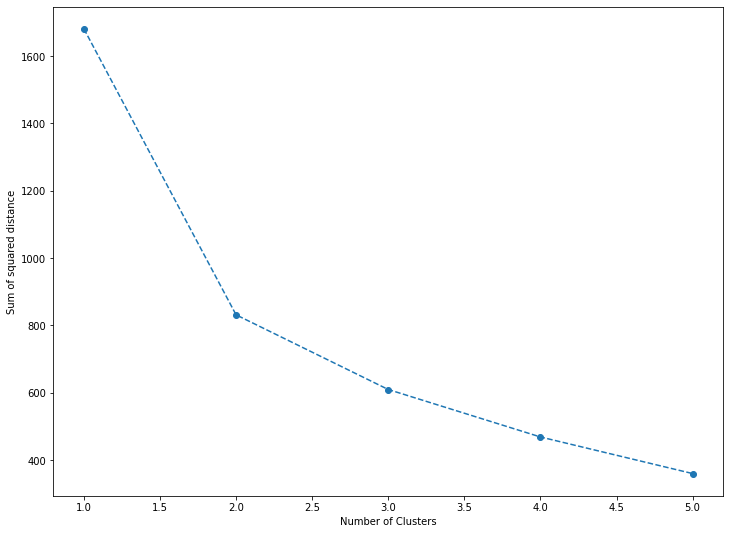

In [447]:
plt.figure(figsize=(12, 9))
plt.plot(index_for_kmeans(results), results, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

